# 1. File I/O

Используйте конструкцию with, которая предоставляет **безопасный** способ создания итератора по входному файлу.

**"with = try / finally"**

Если вы не используете with, открываете файл , но забываете вызвать close() - то это плохая практика. Garbage collector, гипотетически (в CPython), должен закрыть его сам, увидев, что ссылок (reference count) на него больше нет, однако, перекладывание забот на GC едва ли можно назвать допустимым.

In [4]:
import codecs

with codecs.open('small_text_file.in', 'r', "utf-8") as f:
    for line in f:
        print line

This is a test string in English.

Это русская тестовая строка.


Не стесняйтесь использовать with и с другими типами I/O итераторов:

In [5]:
import gzip

with gzip.open('small_gzipped_text_file.in.gz', 'r') as f:
    for line in f:
        print line

This is a test string in English.

Это русская тестовая строка.


И в более сложных случаях:

In [7]:
with codecs.open('small_text_file_w.in', 'w',  encoding='utf-8') as outfile:
    with codecs.open('small_text_file.in', 'r', encoding='utf-8') as infile:
        for line in infile:
            outfile.write(line)

# 2. Не принебрегайте хэшированием.

Как ни странно, но многие предпочли структурам с хэшированием список или строку:

In [27]:
import numpy as np
import string
from collections import defaultdict

In [17]:
alphabet = list(string.lowercase)

In [64]:
def randomword(length):
   return ''.join(np.random.choice(alphabet) for i in xrange(length))

corpus = list(randomword(100) for i in xrange(1000))

def test_1():
    interest = ['a', 'b', 'c']
    counts = defaultdict(int)
    for i in corpus:
        for ch in i:
            if ch in interest:
                counts[ch] += 1
            
def test_2():
    interest = 'abc'
    counts = defaultdict(int)
    for i in corpus:
        for ch in i:
            if ch in interest:
                counts[ch] += 1
                
def test_3():
    interest = {'a', 'b', 'c'}
    counts = defaultdict(int)
    for i in corpus:
        for ch in i:
            if ch in interest:
                counts[ch] += 1

In [65]:
%timeit -n 100 test_1()

100 loops, best of 3: 7.46 ms per loop


In [66]:
%timeit -n 100 test_2()

100 loops, best of 3: 4.79 ms per loop


In [67]:
%timeit -n 100 test_3()

100 loops, best of 3: 5.59 ms per loop


In [84]:
vowels_1 = [u'а', u'о', u'у', u'и', u'э', u'ю', u'я', u'е', u'ё', u'ы']
vowels_2 = u''.join(vowels_1)
vowels_3 = set(vowels_1)
vowels_4 = vowels_2.encode('utf-8')

def test(test_obj):
    hits = 0
    with codecs.open('WP.txt', 'r', 'utf-8') as f:
        for line in f:
            for ch in line:
                if ch in test_obj:
                    hits += 1
                    
def test_lh(test_obj):
    hits = 0
    with open('WP.txt', 'r') as f:
        for line in f:
            for ch in line:
                if ch in test_obj:
                    hits += 1

In [89]:
%timeit -n 10 test(vowels_1)

10 loops, best of 3: 236 ms per loop


In [90]:
%timeit -n 10 test(vowels_2)

10 loops, best of 3: 100 ms per loop


In [91]:
%timeit -n 10 test(vowels_3)

10 loops, best of 3: 103 ms per loop


In [92]:
%timeit -n 10 test_lh(vowels_4)

10 loops, best of 3: 78.5 ms per loop


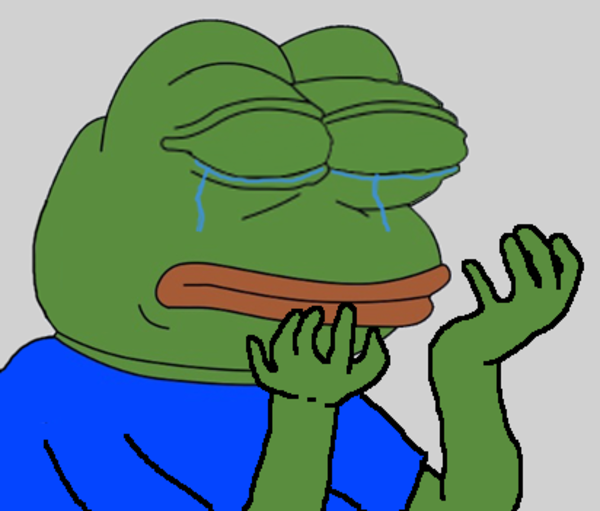

In [93]:
from IPython.display import Image

Image('sad.png')

** Не принебрегайте хэшированием - но помните о конкретных реализациях! **

# 3. Работа со строками "+" и "join"

In [94]:
def method1(loop_count):
  out_str = ''
  for num in xrange(loop_count):
    out_str += 'num'
  return out_str

In [95]:
%timeit method1(1000)

10000 loops, best of 3: 118 µs per loop


In [98]:
def method2(loop_count):
  str_list = []
  for num in xrange(loop_count):
    str_list.append('num')
  return ''.join(str_list)

In [99]:
%timeit method2(1000)

10000 loops, best of 3: 96.7 µs per loop


In [100]:
def method3(loop_count):
  return ''.join(['num' for num in xrange(loop_count)])

In [101]:
%timeit method3(1000)

10000 loops, best of 3: 47.5 µs per loop
